In [55]:
import numpy as np
from pathlib import Path
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [3]:
save_state_path = Path("./custom_image_labelling_save_state")

In [4]:
labels = np.load(save_state_path / "labels.npy")
marked_for_deletion = np.load(save_state_path / "marked_for_deletion.npy")
marked_for_manual = np.load(save_state_path / "marked_for_manual.npy")

In [5]:
(labels[:,0] == 1).sum()

12

In [6]:
(marked_for_deletion == 1).sum()

202

In [7]:
(marked_for_manual == 1).sum()

17

In [8]:
images_pth = Path("./data/images")

In [9]:
from utils import load_images_recursively

images, _ = load_images_recursively(images_pth)

In [33]:
idx_not_marked_for_deletion = np.where(marked_for_deletion == 0)
idx_not_marked_for_manual = np.where(marked_for_manual == 0)

to_keep.shape

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [11]:
len(images)

1512

In [12]:
filtered_images = [images[i] for i in to_keep]

In [13]:
len(filtered_images)

1310

In [14]:
im = np.array(Image.open(filtered_images[0]))

In [15]:
im.shape

(194, 260, 3)

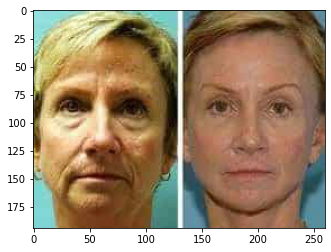

In [16]:
plt.imshow(im)

In [19]:
height, width, a = im.shape

width_cutoff = width // 2

left_half = im[:,0:width_cutoff,:]

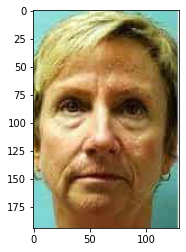

In [20]:
plt.imshow(left_half)

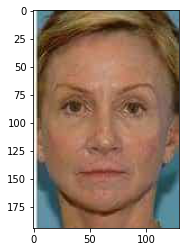

In [21]:
right_half = im[:,width_cutoff:width,:]
plt.imshow(right_half)

In [22]:
from crop_face import convert_face_tensor_to_numpy_array, prepare_single_face_model

cropping_model = prepare_single_face_model(margin=30)

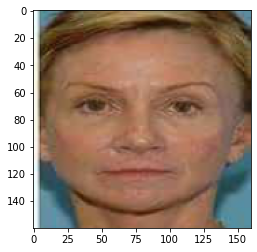

In [26]:
plt.imshow(convert_face_tensor_to_numpy_array(cropping_model(right_half)))

In [32]:
filtered_labels = labels[to_keep]

In [36]:
false_image = np.full([224,224,3], 0)

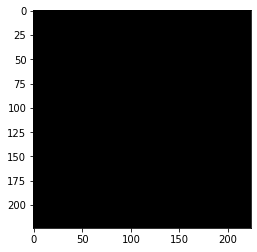

In [37]:
plt.imshow(false_image)

In [59]:
def crop_and_transform(img):
    return convert_face_tensor_to_numpy_array(cropping_model(right_half))

In [51]:
new_crops_path = Path('./data/new_crops')
before_crops_path = new_crops_path / 'before'
after_crops_path = new_crops_path / 'after'

In [53]:
images_and_labels = zip(filtered_images, filtered_labels)

In [73]:
more_manual = np.zeros([len(filtered_images)])

for i, (img_path, labels) in tqdm(enumerate(images_and_labels), total=len(filtered_images)):
    im = np.array(Image.open(img_path))
    height = im.shape[0]
    width = im.shape[1]
    width_cutoff = width // 2
    left_half = im[:,0:width_cutoff,:]
    right_half = im[:,width_cutoff:width,:]
    
    path_parts = img_path.parts
    img_name = path_parts[-2] + '_' + path_parts[-1]
    before_img_path = before_crops_path / img_name
    after_img_path = after_crops_path / img_name
    
    
    before = left_half if labels[0] == 0 else right_half
    after = left_half if labels[0] == 1 else right_half
    
    cropping_model = prepare_single_face_model(margin=30)
    crop_and_transform = lambda i: convert_face_tensor_to_numpy_array(cropping_model(i))
    
    try:
        cropped_before = crop_and_transform(before)
        Image.fromarray(cropped_before).convert('RGB').save(before_img_path)
    except Exception as e:
        print(f'Before could not be extracted from {img_path}')
        more_manual[i] = 1
        Image.fromarray(left_half).convert('RGB').save(before_img_path)
    
    try:
        cropped_after = crop_and_transform(after)
        Image.fromarray(cropped_after).convert('RGB').save(after_img_path)
    except Exception as e:
        print(f'After could not be extracted from {img_path}')
        more_manual[i] = 1
        Image.fromarray(right_half).convert('RGB').save(after_img_path)
    

  2%|▋                                        | 20/1310 [00:01<01:49, 11.78it/s]

After could not be extracted from data/images/beard before after 2/19.jpg


  3%|█                                        | 34/1310 [00:03<01:33, 13.63it/s]

Before could not be extracted from data/images/beard before after 2/103.jpg
After could not be extracted from data/images/beard before after 2/103.jpg


  5%|██▏                                      | 71/1310 [00:07<02:10,  9.49it/s]

After could not be extracted from data/images/makeup before after arabic/45.jpg


  7%|██▋                                      | 87/1310 [00:08<02:36,  7.83it/s]

Before could not be extracted from data/images/makeup before after 4/84.jpg


  7%|██▉                                      | 93/1310 [00:09<01:54, 10.61it/s]

Before could not be extracted from data/images/makeup before after 4/46.jpg
After could not be extracted from data/images/makeup before after 4/46.jpg
Before could not be extracted from data/images/makeup before after 4/63.jpg


  7%|███                                      | 97/1310 [00:09<01:36, 12.63it/s]

Before could not be extracted from data/images/makeup before after 4/27.jpg
After could not be extracted from data/images/makeup before after 4/27.jpg


  8%|███▎                                    | 107/1310 [00:10<01:40, 11.92it/s]

After could not be extracted from data/images/makeup before after 4/42.jpg


  9%|███▊                                    | 123/1310 [00:12<01:48, 10.96it/s]

Before could not be extracted from data/images/makeup before after 4/127.jpg
After could not be extracted from data/images/makeup before after 4/127.jpg


 12%|████▉                                   | 162/1310 [00:15<01:38, 11.67it/s]

Before could not be extracted from data/images/drag queen face before after 1/104.jpg
After could not be extracted from data/images/drag queen face before after 1/104.jpg


 16%|██████▌                                 | 214/1310 [00:20<01:33, 11.77it/s]

Before could not be extracted from data/images/drag queen face before after 1/87.jpg
After could not be extracted from data/images/drag queen face before after 1/87.jpg


 18%|███████▎                                | 241/1310 [00:22<01:21, 13.10it/s]

Before could not be extracted from data/images/haircut face before after 3/80.jpg
After could not be extracted from data/images/haircut face before after 3/80.jpg


 19%|███████▌                                | 247/1310 [00:23<01:28, 12.03it/s]

After could not be extracted from data/images/haircut face before after 3/138.jpg


 22%|████████▉                               | 292/1310 [00:27<01:18, 13.04it/s]

Before could not be extracted from data/images/haircut face before after 3/92.jpg
After could not be extracted from data/images/haircut face before after 3/92.jpg


 28%|███████████▎                            | 372/1310 [00:35<01:19, 11.84it/s]

Before could not be extracted from data/images/images 1 makeup before and after/79.jpg
After could not be extracted from data/images/images 1 makeup before and after/79.jpg


 30%|████████████                            | 394/1310 [00:37<01:14, 12.28it/s]

Before could not be extracted from data/images/makeup before after 5/63.jpg


 31%|████████████▏                           | 400/1310 [00:37<01:27, 10.40it/s]

Before could not be extracted from data/images/makeup before after 5/127.jpg
After could not be extracted from data/images/makeup before after 5/127.jpg


 34%|█████████████▋                          | 449/1310 [00:42<01:07, 12.81it/s]

Before could not be extracted from data/images/makeup before after chinese/86.jpg
After could not be extracted from data/images/makeup before after chinese/86.jpg


 35%|██████████████▏                         | 465/1310 [00:43<01:13, 11.49it/s]

Before could not be extracted from data/images/makeup before after chinese/96.jpg
After could not be extracted from data/images/makeup before after chinese/96.jpg
Before could not be extracted from data/images/makeup before after chinese/85.jpg
After could not be extracted from data/images/makeup before after chinese/85.jpg


 36%|██████████████▌                         | 475/1310 [00:44<01:03, 13.08it/s]

Before could not be extracted from data/images/makeup before after chinese/59.jpg
After could not be extracted from data/images/makeup before after chinese/59.jpg


 37%|██████████████▊                         | 487/1310 [00:45<01:18, 10.51it/s]

Before could not be extracted from data/images/makeup before after chinese/79.jpg
After could not be extracted from data/images/makeup before after chinese/79.jpg


 38%|███████████████                         | 493/1310 [00:45<01:03, 12.86it/s]

Before could not be extracted from data/images/makeup before after chinese/116.jpg
Before could not be extracted from data/images/makeup before after chinese/83.jpg
After could not be extracted from data/images/makeup before after chinese/83.jpg


 38%|███████████████▎                        | 503/1310 [00:46<00:58, 13.70it/s]

After could not be extracted from data/images/makeup before after chinese/94.jpg


 42%|████████████████▋                       | 547/1310 [00:50<01:14, 10.29it/s]

Before could not be extracted from data/images/drag queen face before after 2/116.jpg
After could not be extracted from data/images/drag queen face before after 2/116.jpg


 42%|████████████████▉                       | 553/1310 [00:51<01:28,  8.57it/s]

Before could not be extracted from data/images/drag queen face before after 2/52.jpg


 43%|█████████████████▏                      | 561/1310 [00:52<01:21,  9.16it/s]

Before could not be extracted from data/images/beard before after 3/20.jpg


 45%|█████████████████▊                      | 585/1310 [00:55<01:17,  9.32it/s]

Before could not be extracted from data/images/beard before after 3/107.jpg
After could not be extracted from data/images/beard before after 3/107.jpg


 45%|██████████████████                      | 593/1310 [00:56<01:27,  8.16it/s]

After could not be extracted from data/images/hiardoo before after men 6/3.jpg


 47%|██████████████████▋                     | 613/1310 [00:57<01:05, 10.60it/s]
